In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the three dataframes
refugee_df = pd.read_csv('Resources\demographic_ml_df.csv')
death_df = pd.read_csv('Resources\event_ml_df.csv')


In [3]:
rows_and_cols = refugee_df.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

There are 61199 rows and 26 columns.



In [4]:
#drop rows that for countries that do not report demographic data. 

r_df = refugee_df.loc[(refugee_df['Male total'] != 0) | (refugee_df['Female total'] != 0)].reset_index()
r_df.drop(['index',Male total'Unnamed: 0', 'Female total','unknown_demographic','',
        'recognized_decisions', 'complementary_protection', 'rejected','otherwise_closed', 'total_decisions'], axis=1, inplace=True)
r_df.reset_index(drop=True, inplace=True)
r_df = r_df.rename(columns={'total': 'total_refugees'})
r_df 

,year,country_origin,country_asylum,share_borders,female_0to4,female_5to11,female_12to17,female_18to59,female_60,female_other,male_0to4,male_5to11,male_12to17,male_18to59,male_60,male_other,total_refugees
0,2001,Afghanistan,Azerbaijan,0,8,12,10,38,0,0,9,26,22,118,0,0,243
1,2001,Afghanistan,Belarus,0,9,40,36,81,6,0,9,34,35,199,5,0,454
2,2001,Afghanistan,Belgium,0,0,0,0,0,0,144,0,0,0,0,0,213,357
3,2001,Afghanistan,Cambodia,0,0,0,0,5,0,0,0,5,0,7,0,0,17
4,2001,Afghanistan,Chile,0,0,0,0,0,0,0,0,0,0,5,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29138,2021,Zimbabwe,Namibia,0,0,0,11,12,0,0,0,8,0,17,0,0,48
29139,2021,Zimbabwe,Romania,0,5,0,0,0,0,0,0,0,0,0,0,0,5
29140,2021,Zimbabwe,South Africa,1,0,43,146,1481,73,0,0,40,137,1975,70,0,3965
29141,2021,Zimbabwe,Switzerland,0,0,9,0,0,0,0,0,0,0,0,0,0,9


In [5]:
#check to see which features share the best correlations

corr_columns = r_df.corr()
corr_columns

,year,share_borders,female_0to4,female_5to11,female_12to17,female_18to59,female_60,female_other,male_0to4,male_5to11,male_12to17,male_18to59,male_60,male_other,total_refugees
year,1.000000,-0.051537,0.023527,0.025817,0.015206,0.020943,0.009112,-0.020726,0.023543,0.025382,0.014185,0.018090,0.007331,-0.019902,0.011946
share_borders,-0.051537,1.000000,0.206512,0.211582,0.215425,0.203040,0.211902,0.064885,0.203435,0.208276,0.209988,0.169757,0.195187,0.060432,0.228145
female_0to4,0.023527,0.206512,1.000000,0.960593,0.906686,0.948119,0.828931,0.021467,0.999393,0.960207,0.908077,0.897309,0.810650,0.026315,0.904666
female_5to11,0.025817,0.211582,0.960593,1.000000,0.957795,0.971707,0.850043,0.018994,0.960101,0.999423,0.962745,0.916860,0.877386,0.023651,0.933412
female_12to17,0.015206,0.215425,0.906686,0.957795,1.000000,0.950542,0.838769,0.019082,0.905374,0.957213,0.993042,0.903416,0.887514,0.022898,0.915815
female_18to59,0.020943,0.203040,0.948119,0.971707,0.950542,1.000000,0.902248,0.014495,0.950441,0.974526,0.956985,0.970002,0.912434,0.020925,0.938901
female_60,0.009112,0.211902,0.828931,0.850043,0.838769,0.902248,1.000000,0.013904,0.830508,0.851239,0.837477,0.857468,0.927621,0.021346,0.833640
female_other,-0.020726,0.064885,0.021467,0.018994,0.019082,0.014495,0.013904,1.000000,0.020984,0.018626,0.018491,0.009632,0.008663,0.978913,0.173911
male_0to4,0.023543,0.203435,0.999393,0.960101,0.905374,0.950441,0.830508,0.020984,1.000000,0.960265,0.907814,0.903285,0.814344,0.026214,0.905946
male_5to11,0.025382,0.208276,0.960207,0.999423,0.957213,0.974526,0.851239,0.018626,0.960265,1.000000,0.963716,0.924584,0.880727,0.023437,0.935410


In [6]:
#male and female other show weak corr with total refugees. Dropping it. 
r_df.drop(['female_other','male_other','country_origin', 'country_asylum'], axis=1, inplace=True)
r_df.reset_index(drop=True, inplace=True)
r_df

,year,share_borders,female_0to4,female_5to11,female_12to17,female_18to59,female_60,male_0to4,male_5to11,male_12to17,male_18to59,male_60,total_refugees
0,2001,0,8,12,10,38,0,9,26,22,118,0,243
1,2001,0,9,40,36,81,6,9,34,35,199,5,454
2,2001,0,0,0,0,0,0,0,0,0,0,0,357
3,2001,0,0,0,0,5,0,0,5,0,7,0,17
4,2001,0,0,0,0,0,0,0,0,0,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29138,2021,0,0,0,11,12,0,0,8,0,17,0,48
29139,2021,0,5,0,0,0,0,0,0,0,0,0,5
29140,2021,1,0,43,146,1481,73,0,40,137,1975,70,3965
29141,2021,0,0,9,0,0,0,0,0,0,0,0,9


Can we determine makeup of the refugees by age and gender from a total refugee count? 

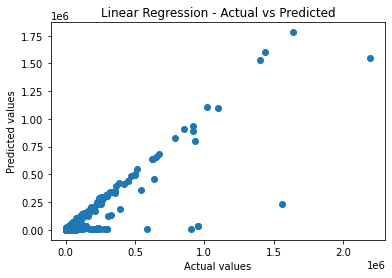

Linear Regression metrics:
MSE: 713185509.92
MAE: 2984.52
R-squared: 0.80
-------------------


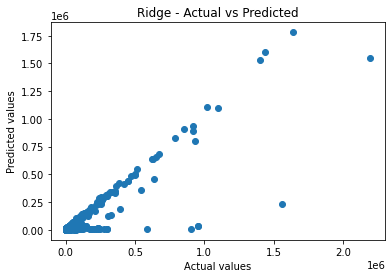

Ridge metrics:
MSE: 713183233.62
MAE: 2984.36
R-squared: 0.80
-------------------


c:\Users\erdos\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.362e+11, tolerance: 1.405e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


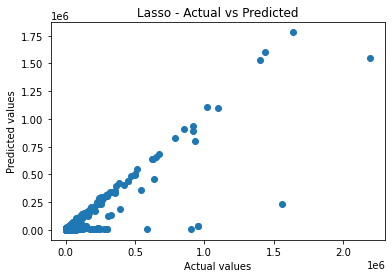

Lasso metrics:
MSE: 713384854.06
MAE: 2984.53
R-squared: 0.80
-------------------


In [7]:
#Function that will loop through Linear Regression, Ridge, and Lasso to see evaluate the perfmance when comparing the age/sex count vs the total refugee count. 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

def evaluate_classification_models(data):
    # Split the data into training and testing sets
    X = data.drop('total_refugees', axis=1)
    y = data['total_refugees']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()

    # Fit the scaler to your data and transform it
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the classification models to evaluate
    models = [
        ('Linear Regression', LinearRegression()),
        ('Ridge', Ridge(max_iter=10000)),
        ('Lasso', Lasso(max_iter=10000))
    ]

    # Train and evaluate each model
    for name, model in models:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict( X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Plot actual vs predicted values
        plt.scatter(y_test, y_pred)
        plt.xlabel('Actual values')
        plt.ylabel('Predicted values')
        plt.title(f'{name} - Actual vs Predicted')
        plt.show()
        # Print the performance indicators
        print(f'{name} metrics:')
        print(f'MSE: {mse:.2f}')
        print(f'MAE: {mae:.2f}')
        print(f'R-squared: {r2:.2f}')
        print('-------------------')

evaluate_classification_models(r_df)